<a href="https://colab.research.google.com/github/JGB-colab/Imersao_Dados_IA_Generativa/blob/main/Imersao_IA_Proj__Gestao_Produtividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gestão de produtividade
<div align ="align">
<img width="800" height = "600"  title="GEMINI ROUTINE" src="https://i.pinimg.com/736x/de/f9/09/def9094da4ee4f750bd1d54a964d8979.jpg"/>


Todos queremos ter uma vida melhor de tal modo que muitas vezes nos propomos a fazer muitas coisas, contudo, muitas vezes organizar nossa rotina parece ser  uma tarefa árdua e complexa(e de fato é).
</p>
      
      
Por isso, esse projeto visa te trazer sugestões de rotinas que você pode seguir com base nos seus objetivos...

A ideia é bem simples:

1- Tire print da sua agenda google semanal com suas tarefas da semana.

2- Descreva seus objetivos de acordo com a quantidade de horas que você espera estudar para aquela tarefas

3 - Analise a que melhor se encaixa a seu contexto

## Apresentação de uso do model



```
Olá tudo bem?

Sou um modelo criado especificamente para te ajudar a organizar sua rotina, de tal modo que você possa te dar um misto entre equilíbrio e produtividade.
      
Para interagir comigo você deve digitar os seguintes comandos:

  1 - Tire um print da sua agenda do google (sua rotina semanal)

  2 - Diga quais são seus objetivos (se você deseja estudar, dedicar mais tempo ao trabalho ou ir na academia, por exemplo)

  3 - Descreva a opções diferentes que você deseja ter para que você encontre alguma que seja do seu agrado.
```



In [1]:
# Criando um chatbot com Gemini IA
!pip install -q -U google-generativeai

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


# Usando o modelo

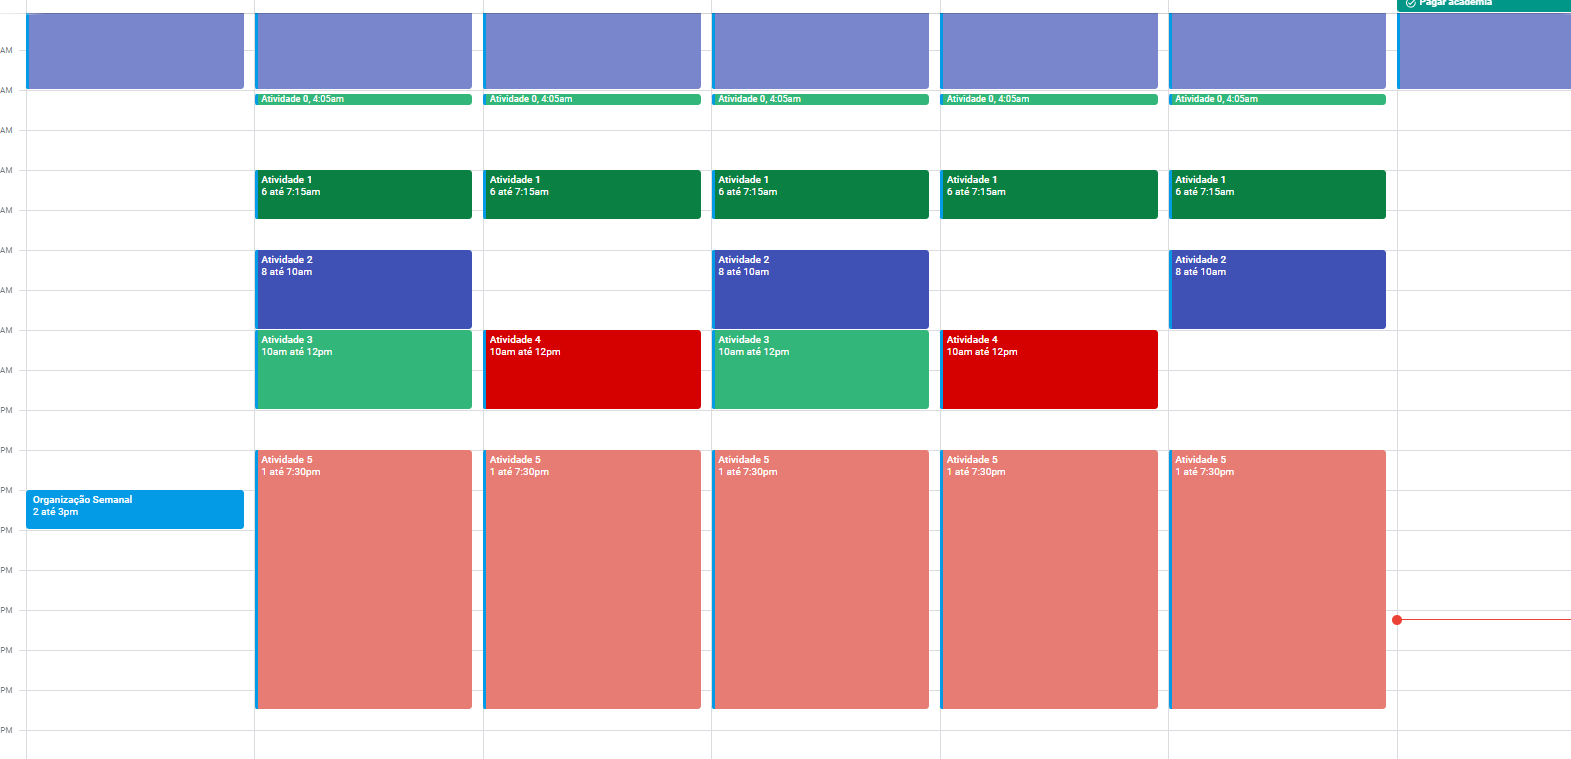

In [42]:
from pathlib import Path
import hashlib
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY = userdata.get("SECRET_KEY")

genai.configure(api_key = GOOGLE_API_KEY)

# Set up the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  "max_output_tokens": 8192,
}
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

#Aplicando caracterísitca ao modelo para direcionar seu escopo de atuação

system_instruction = "Você é um especialista em produtividade e performance que sabe a melhor forma de ajudar seus clientes a maximizar sua produtividade de modo saúdável"

# aplicando congifurações de modelo, configuração de resposta(por meio top_k, top_p, temperature), direcionamento do modelo e configurações de segurança

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              system_instruction=system_instruction,
                              safety_settings=safety_settings)

# Descrevendo variáveis que serão usadas para construção da rotina(image + texto)
# Isso só é possível devido a multimodularidade do modelo que aceita diversos formatos de arquivos

image = input("Carregue sua imagem de rotina na aplicação(copia o caminho relativo da imagem): ")
objetivos =input("Descreva seu objetivos em lista, p.ex >> Estudar IA Generativa, Correr uma vez na semana,etc.")
quantidade_opcoes = input("Defina quantas opções de rotina você deseja:")

convo = model.start_chat(history=[
  {
    "role": "user",
    "parts": [genai.upload_file(f"{image}")]
  },
  {
    "role": "user",
    "parts": [f'''​Gostaria que você me desse {quantidade_opcoes} opções de rotinas que possam se encaixar corretamente de acordo com a imagem e que maximize os seguintes objetivos
               {objetivos} durante a semana.''']
  }
])
print('------------------------------------------------------------------------------------------------------------------------\n')
convo.send_message("YOUR_USER_INPUT")
print(print(convo.history[-1].parts[0].text))

Carregue sua imagem de rotina na aplicação(copia o caminho relativo da imagem): /content/rotina.png
Descreva seu objetivos em lista, p.ex >> Estudar IA Generativa, Correr uma vez na semana,etc.Andar de bicleta
Defina quantas opções de rotina você deseja:5
------------------------------------------------------------------------------------------------------------------------

Olhando para a sua semana, vejo que você tem um bloco grande dedicado à "Atividade 5" e alguns espaços menores pela manhã e no início da tarde. Para encaixar o ciclismo na sua rotina, vou te dar 5 opções que variam em intensidade e tempo. 

**Opções de Rotina com Ciclismo:**

**1. Ciclismo Leve pela Manhã:**

* **Segunda à Sexta:** Acordar 30 minutos mais cedo e fazer um passeio de bicicleta leve por 30 minutos antes da "Atividade 0". 
* **Benefícios:** Começar o dia com energia, integrar o exercício à rotina matinal e aproveitar o ar fresco. 

**2. Intensidade Moderada após o Trabalho:**

* **Segunda, Quarta e Sex